## Loan credit default  Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('credit_risk.csv')

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


#### person_age: age of a person in years
#### person_income: income of a person
#### person_home_ownership: home ownership- rent, own , mortgage
#### person_emp_length: person's employement lenght
#### loan_intent: type of loan 
#### loan_grade: loan grade- A,B,C,D,E,F,G
#### loan_amount: amount of loan taken
#### loan_int_rate: loan interest rate
#### loan_status: active or not
#### loan_ percent_income: income percentage as per loan amount
#### cb_person_default_on_file: loan defaulter or not- Y,N

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### Categorical data : person_home_ownership, loan_intent, loan_grade, cb_person_default_on_file
### Numerical data : person_age, person_income, person_emp_length, loan_amnt, loan_int_rate, loan_status

## Descriptive Analysis

In [5]:
df.shape

(32581, 12)

In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
df['person_age'].sort_values()

1313      20
12943     20
14827     20
15830     20
11902     20
        ... 
575      123
747      123
81       144
183      144
32297    144
Name: person_age, Length: 32581, dtype: int64

In [8]:
df['loan_grade'].value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

In [9]:
df['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64

In [10]:
df['loan_grade'].value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

In [11]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [12]:
df['loan_status'].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [13]:
df['cb_person_cred_hist_length'].value_counts()

cb_person_cred_hist_length
2     5965
3     5943
4     5925
8     1902
7     1901
9     1895
5     1881
6     1857
10    1850
14     492
12     485
11     463
16     451
13     443
15     437
17     407
20      31
24      30
28      27
27      22
22      22
23      22
30      22
19      21
21      20
18      19
25      18
26      16
29      14
Name: count, dtype: int64

ValueError: could not convert string to float: 'RENT'

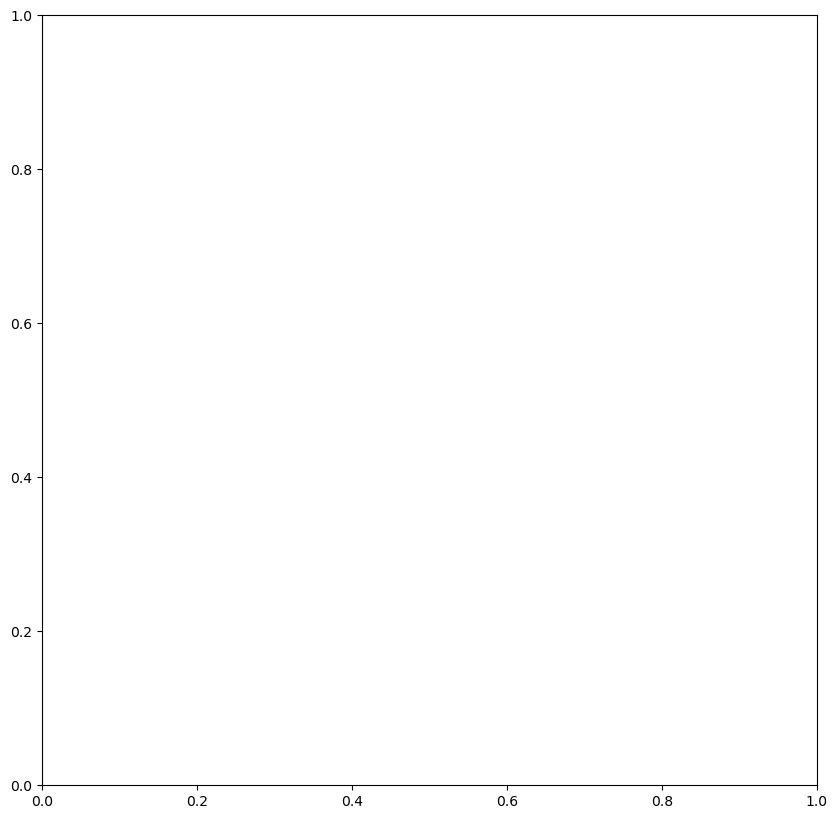

In [14]:
fig,ax = plt.subplots(figsize=(10, 10))

# plot a heatmap for the correlation matrix
# annot: print values in each cell
# linewidths: specify width of the line specifying the plot
# vmin: minimum value of the variable
# vmax: maximum value of the variable
# cmap: colour code of the plot
# fmt: set the decimal place of annot
sns.heatmap(df.corr(), annot = True, linewidths = 0.05, vmin = -1 , vmax = 1, cmap = "YlGnBu" , fmt = '10.4f')

# display the plot
plt.show()

### Data is moderately correlated.

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(df['cb_person_cred_hist_length'], bins=20, kde=True)
plt.title('Distribution of cb_person_cred_hist_length')
plt.xlabel('cb_person_cred_hist_length')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(df['loan_amnt'], bins=20, kde=True)
plt.title('Distribution of loan_amnt')
plt.xlabel('loan_amnt')
plt.ylabel('Frequency')

plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(df['loan_int_rate'], bins=20, kde=True,color='green')
plt.title('Distribution of Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(df['loan_percent_income'], bins=20, kde=True,color='green')
plt.title('Distribution of Previous Scores')
plt.xlabel('Previous Scores')
plt.ylabel('Frequency')

plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.histplot(df['person_age'], bins=20, kde=True,color='orange')
plt.title('Distribution of person_age')
plt.xlabel('person_age')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(df['loan_int_rate'], bins=20, kde=True,color='orange')
plt.title('Distribution of loan_int_rate')
plt.xlabel('loan_int_rate')
plt.ylabel('Frequency')

plt.show()

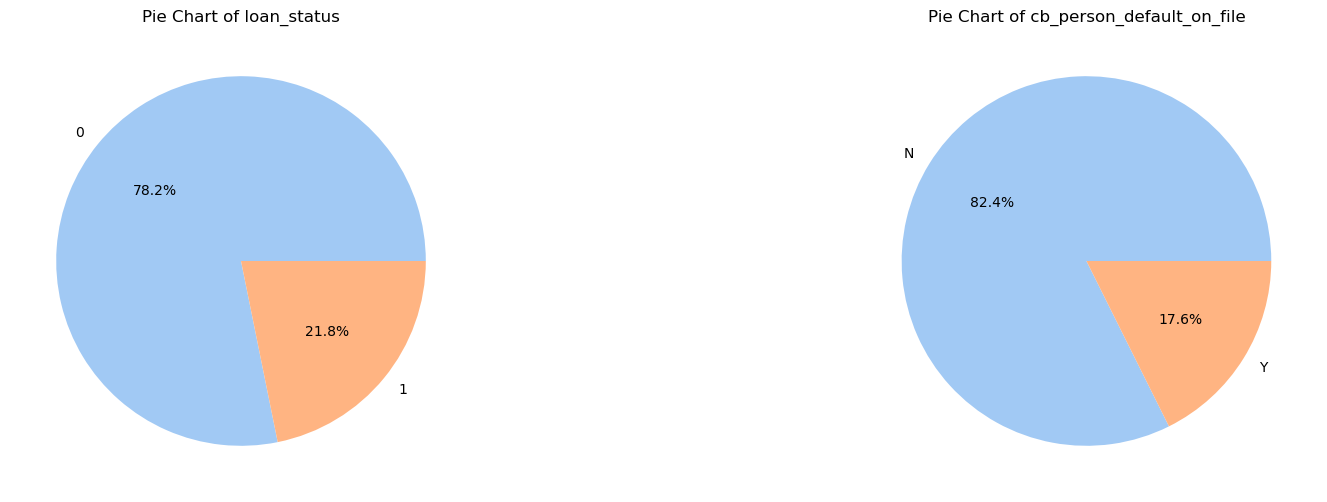

In [15]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
df['loan_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of loan_status')
plt.ylabel('')

plt.subplot(1,2,2)
df['cb_person_default_on_file'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of cb_person_default_on_file')
plt.ylabel('')

plt.show()

In [16]:
category = df[['person_home_ownership', 'loan_grade', 'cb_person_default_on_file', 'loan_intent']]

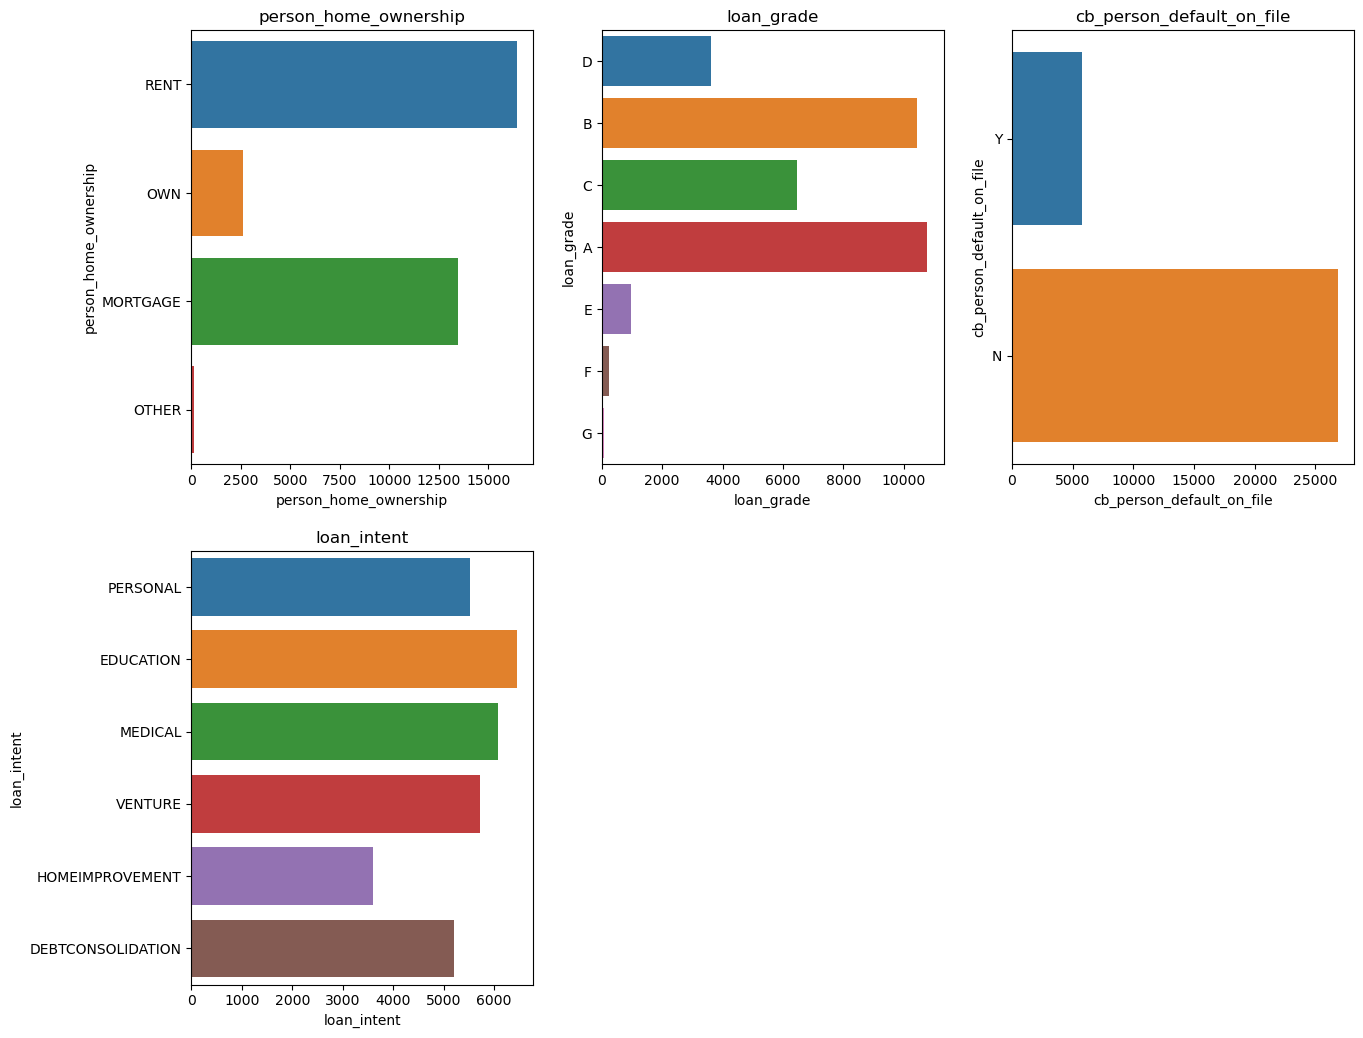

In [17]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in category:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

### Inferences

#### 1. Most of the person who has taken loan is either rent a house or has house on mortgage.
#### 2. loan grade A and loan grade B has the maximum count followed by loan grade C and D.
#### 3. in our data set aorund 5000 person are loan defaulters.
#### 4. most frequent taken loan is Education , medical ,Venture and personal.

### person's age analysis

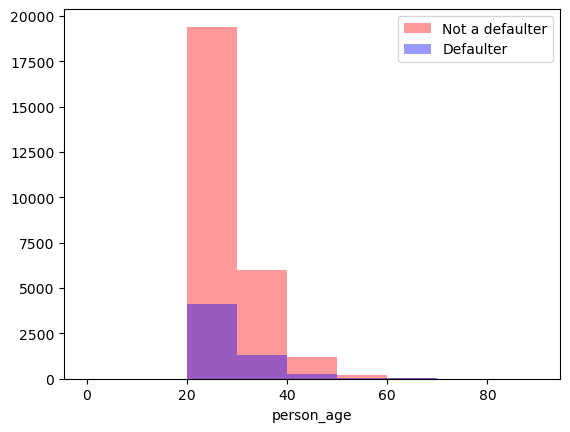

In [18]:
bins = range(0, 100, 10)
ax = sns.distplot(df.person_age[df.cb_person_default_on_file=='N'],
              color='red', kde=False, bins=bins, label="Not a defaulter")
sns.distplot(df.person_age[df.cb_person_default_on_file=='Y'],
         ax=ax,  # Overplots on first plot
         color='blue', kde=False, bins=bins, label="Defaulter")
plt.legend()
plt.show()

#### Age lies mostly between 20 to 60. Where age group 20-40 has more number of defaulters present.

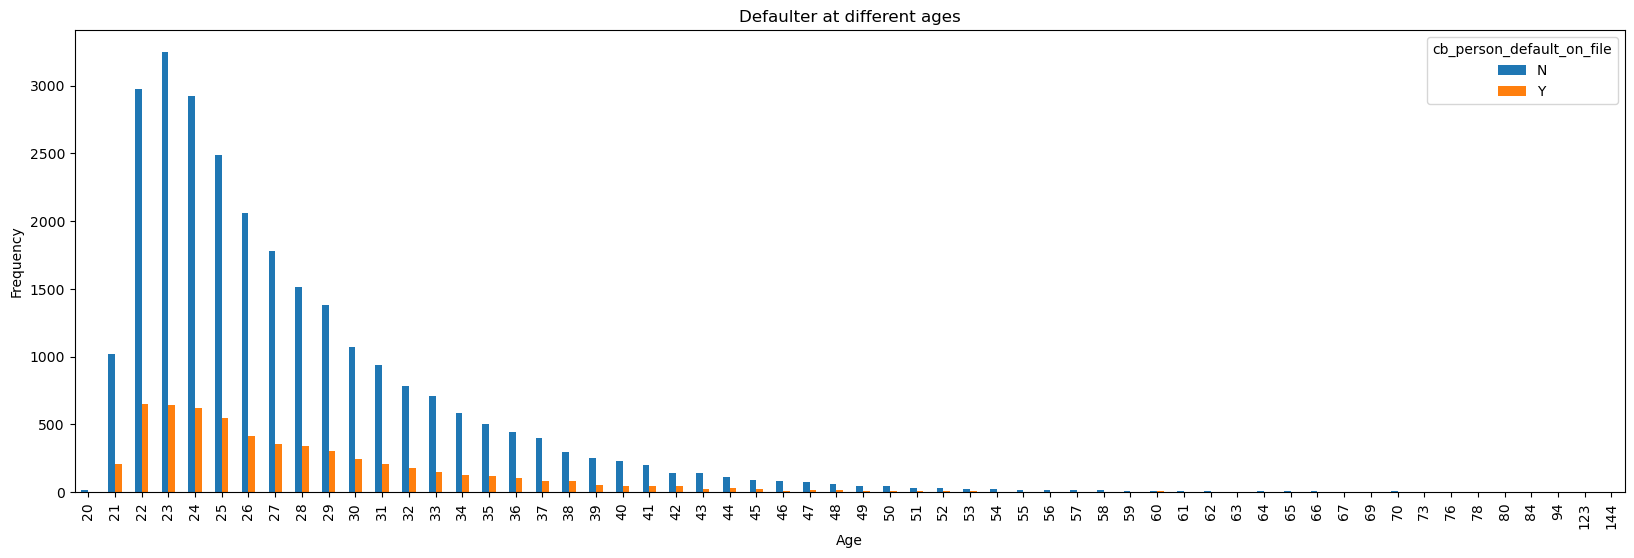

In [19]:
pd.crosstab(df.person_age,df.cb_person_default_on_file).plot(kind="bar",figsize=(20,6))
plt.title('Defaulter at different ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

####  The above graph shows the variation in age with defaulter or not.

#### Outlier detection

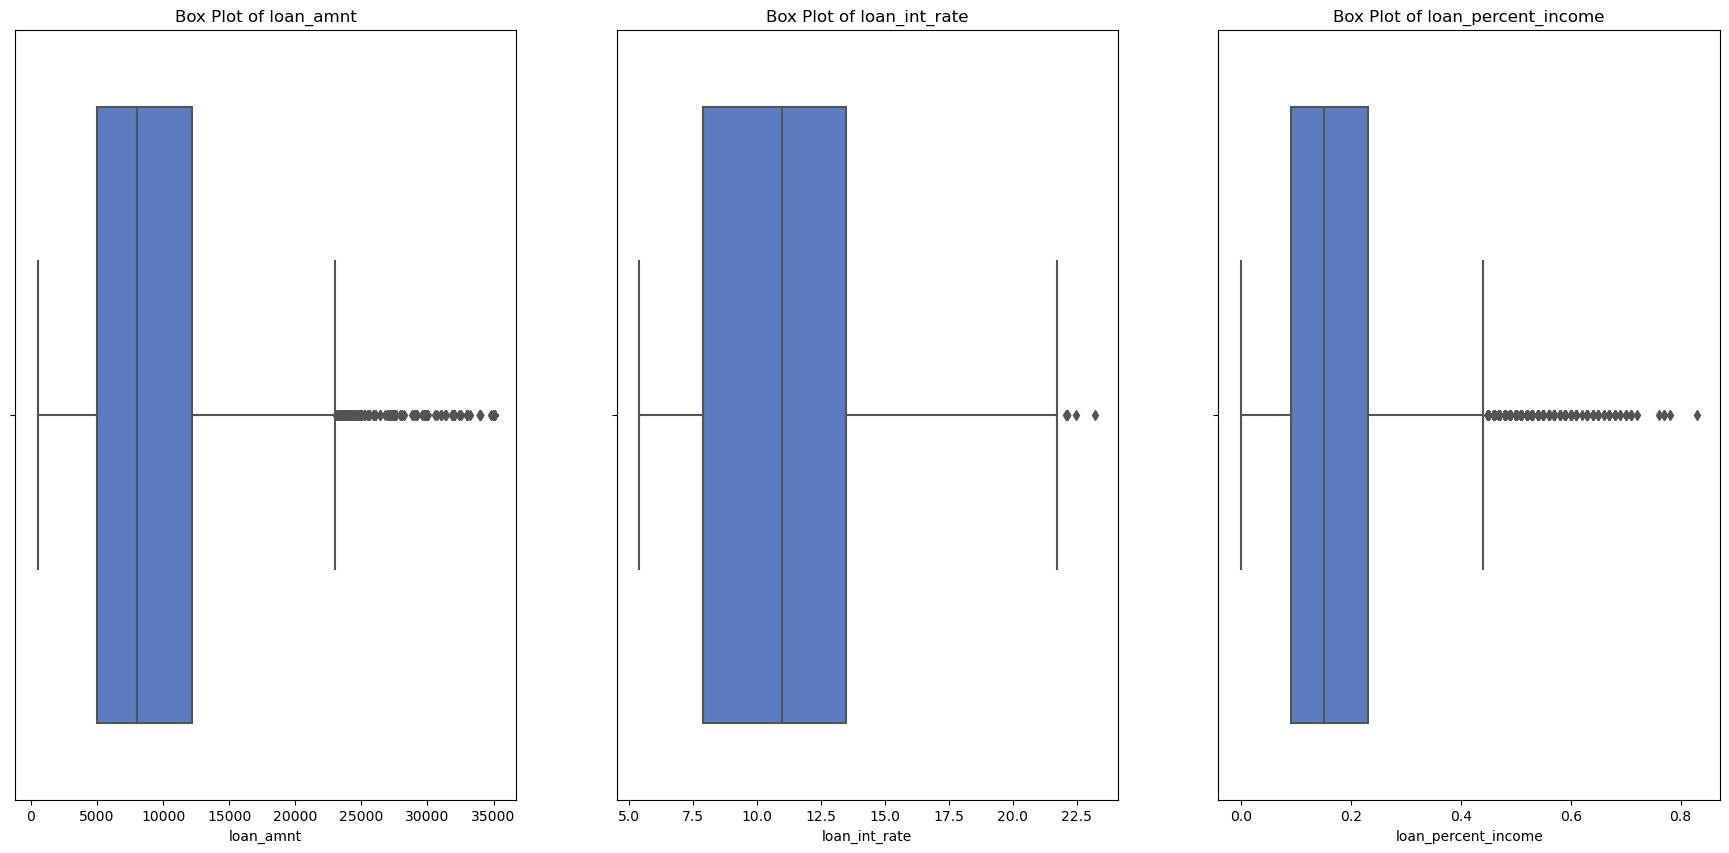

In [20]:
plt.figure(figsize=(22, 10))

plt.subplot(1,3,1)
sns.boxplot(x=df['loan_amnt'],palette = ("muted"))
plt.title('Box Plot of loan_amnt')
plt.xlabel('loan_amnt')

plt.subplot(1,3,2)
sns.boxplot(x=df['loan_int_rate'] ,palette = ("muted"))
plt.title('Box Plot of loan_int_rate')
plt.xlabel('loan_int_rate')

plt.subplot(1,3,3)
sns.boxplot(x=df['loan_percent_income'],palette = ("muted"))
plt.title('Box Plot of loan_percent_income')
plt.xlabel('loan_percent_income')

plt.show()

#### Box plot for loan_amnt shows there are some outliers present at the right side,
#### Box plot for loan_int_rate shows there are very few outliers present at the right side,
#### Box plot for loan_percent_income shows there are some outliers present at the right side.

### Data pre processing

#### Checking null values in each columns

In [21]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

#### Mean Imputation for missing values in loan interest rate column as there are very few outliers present in loan interest rate column.


In [22]:
df.loan_int_rate.fillna(df.loan_int_rate.mean(),inplace=True)

In [23]:
df.isna().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             895
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                   0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

In [24]:
df= df.dropna()

In [25]:
df.shape

(31686, 12)

In [26]:
df = df.drop_duplicates()

In [27]:
df.shape

(31529, 12)

In [28]:
# dropping less important column.

In [29]:
df = df.drop(columns=['cb_person_cred_hist_length'])

In [30]:
df_num = df.select_dtypes(include='number')

In [31]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)

# calculate of interquartile range 
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#### Removing Outliers - As there are sufficient number of rows in the dataset (32581) we can remove the outliers, it won't affect the model much.

In [32]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [33]:
df.shape

(21058, 11)

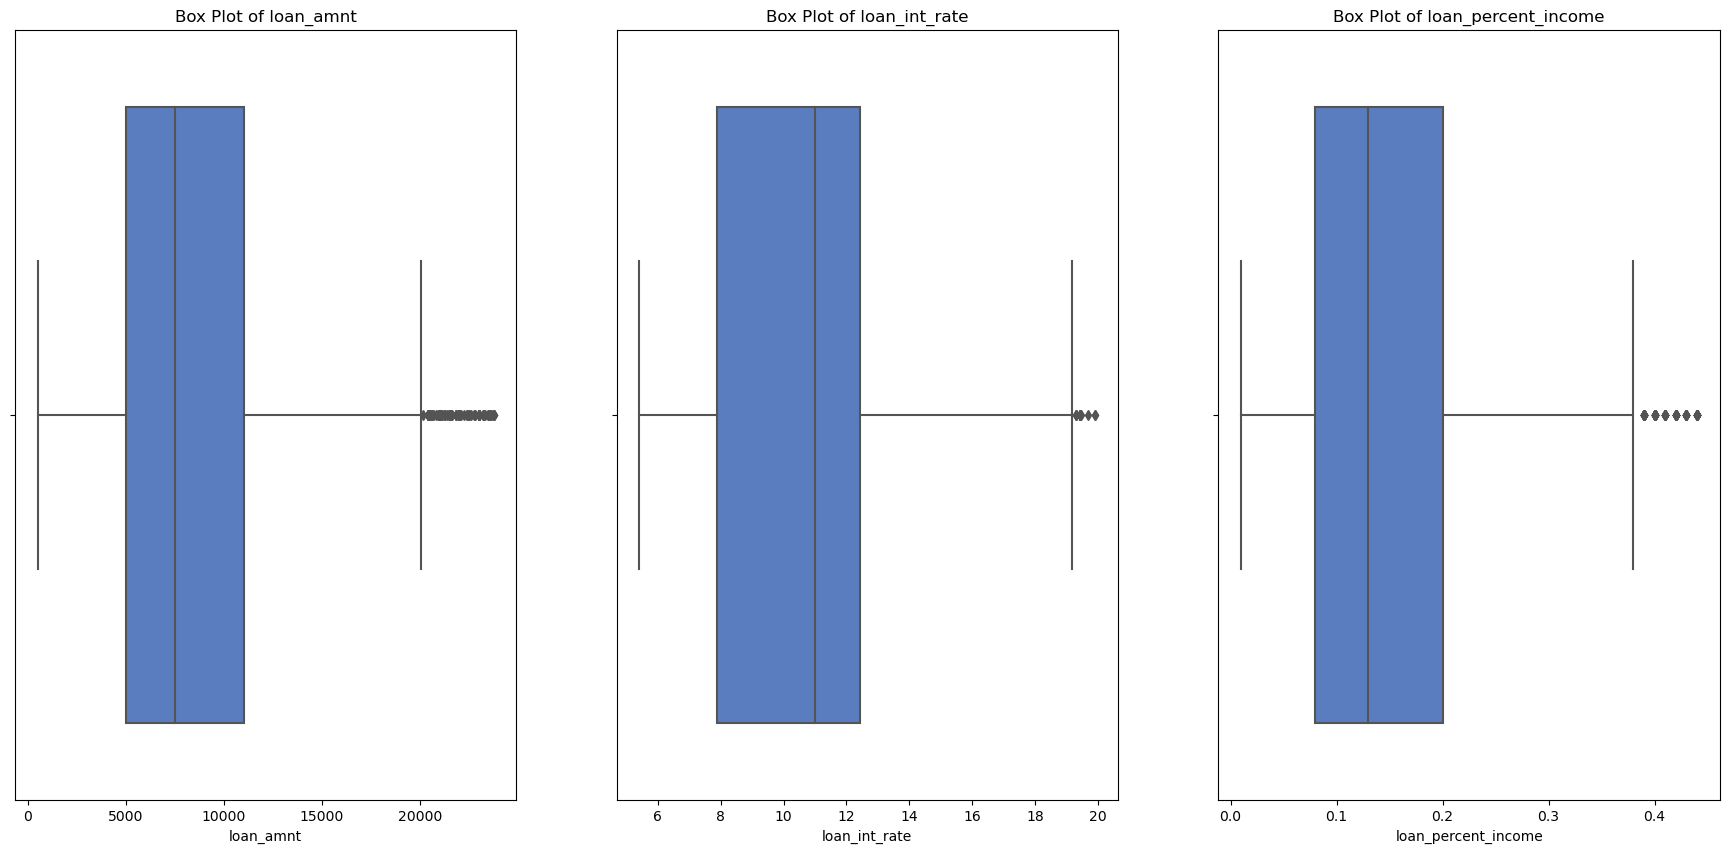

In [34]:
plt.figure(figsize=(22, 10))

plt.subplot(1,3,1)
sns.boxplot(x=df['loan_amnt'],palette = ("muted"))
plt.title('Box Plot of loan_amnt')
plt.xlabel('loan_amnt')

plt.subplot(1,3,2)
sns.boxplot(x=df['loan_int_rate'] ,palette = ("muted"))
plt.title('Box Plot of loan_int_rate')
plt.xlabel('loan_int_rate')

plt.subplot(1,3,3)
sns.boxplot(x=df['loan_percent_income'],palette = ("muted"))
plt.title('Box Plot of loan_percent_income')
plt.xlabel('loan_percent_income')

plt.show()

In [35]:
df_num = df.select_dtypes(include='number')

In [36]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [37]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [38]:
df.shape

(20119, 11)

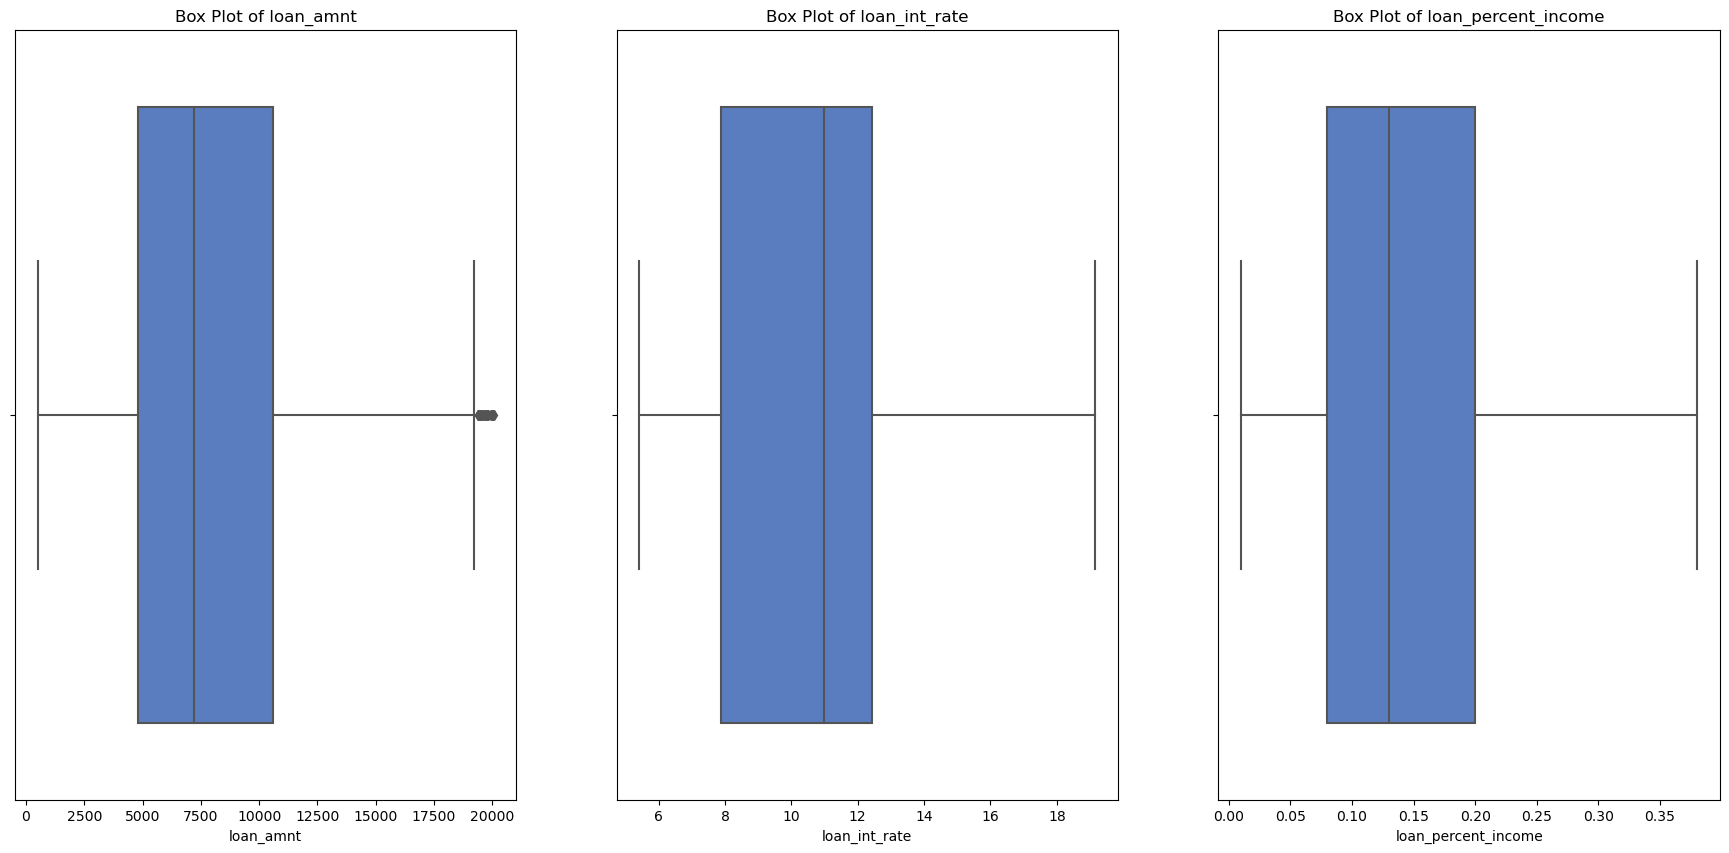

In [39]:
plt.figure(figsize=(22, 10))

plt.subplot(1,3,1)
sns.boxplot(x=df['loan_amnt'],palette = ("muted"))
plt.title('Box Plot of loan_amnt')
plt.xlabel('loan_amnt')

plt.subplot(1,3,2)
sns.boxplot(x=df['loan_int_rate'] ,palette = ("muted"))
plt.title('Box Plot of loan_int_rate')
plt.xlabel('loan_int_rate')

plt.subplot(1,3,3)
sns.boxplot(x=df['loan_percent_income'],palette = ("muted"))
plt.title('Box Plot of loan_percent_income')
plt.xlabel('loan_percent_income')

plt.show()

####  After treating the outliers it is observed that most of the outliers are removed from out dataset.

In [40]:
X = df.drop('cb_person_default_on_file', axis=1)
y = df['cb_person_default_on_file']
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.140000,0,0.10
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.290000,0,0.14
27,23,11000,OWN,0.0,PERSONAL,A,1400,9.320000,0,0.13
59,24,12000,OWN,2.0,VENTURE,E,1750,11.011695,0,0.15
65,22,12000,MORTGAGE,7.0,EDUCATION,D,1500,14.840000,0,0.13


In [41]:
X_num = X.select_dtypes('number')
X_cat = X.select_dtypes('object')

#### Scaling Numerical Data

In [42]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [43]:
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

#### Encoding Categorical data

In [44]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)  

In [45]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [46]:
from sklearn import preprocessing


#### Label encoding

In [47]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
y_encoded= label_encoder.fit_transform(y)
  


In [48]:
y = pd.DataFrame(y_encoded)

In [49]:
y.head()

,0
0,0
1,0
2,0
3,1
4,1


#### Train test split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.neighbors import KNeighborsClassifier


## KNN Classification

In [274]:
Knn_model = KNeighborsClassifier(n_neighbors=5)
Knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [275]:
knntrain_pred = Knn_model.predict(X_train)

In [276]:
from sklearn.metrics import f1_score


In [277]:
print("F-1 Score on train dataset:",f1_score(y_train,knntrain_pred))

F-1 Score on train dataset: 0.686425339366516


In [278]:
knntest_pred = Knn_model.predict(X_test)
print("F-1 Score on test dataset:",f1_score(y_test,knntest_pred))


F-1 Score on test dataset: 0.5094991364421416


In [70]:
knn_train = 0.6864
knn_test = .5094

In [279]:
from sklearn.metrics import confusion_matrix, roc_auc_score 

### Confusion Matrix- KNN  (Train)

<Axes: >

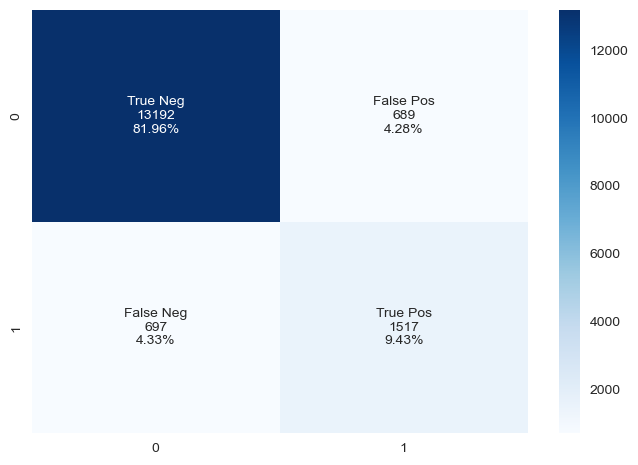

In [280]:
cf_matrix = confusion_matrix(y_train,knntrain_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

####  Confusion matrix for train data shows that the model is performing adequatly in predicting whether are person is loan defaulter or not.

### Confusion Matrix- KNN  (Test)

<Axes: >

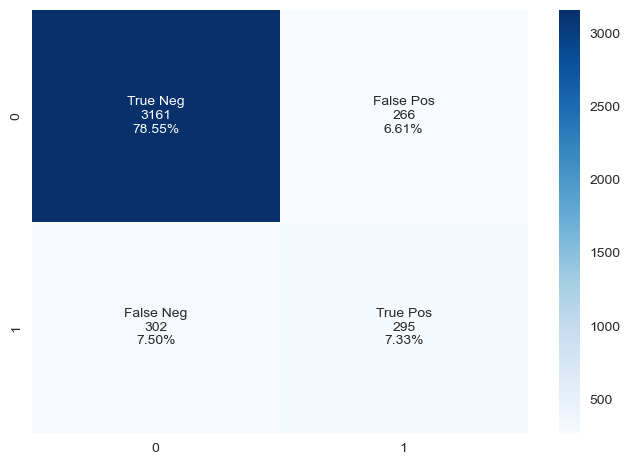

In [281]:
cf_matrix = confusion_matrix(y_test,knntest_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

####  Confusion matrix for test data shows that the model is performing adequatly in test data predicting whether are person is loan defaulter or not.

In [311]:
# To find best K value in KNN classifier, for different K values fitting the model.

In [313]:
k_values = np.arange(1, 10, 2)
train_mape_scores = []
test_mape_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    
    # Train the model on the full training set and calculate train MAPE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_mape = f1_score(y_train, train_pred)
    train_mape_scores.append(train_mape)
    
    # Calculate test MAPE
    test_pred = knn.predict(X_test)
    test_mape = f1_score(y_test, test_pred)
    test_mape_scores.append(test_mape)

In [315]:
KNN = pd.DataFrame({'K-val':np.arange(1, 10, 2), 'f-1Score(train)':train_mape_scores, 'f-1Score(test)':test_mape_scores })
KNN

,K-val,f-1Score(train),f-1Score(test)
0,1,0.992760,0.498239
1,3,0.754589,0.508297
2,5,0.686425,0.509499
3,7,0.655103,0.512864
4,9,0.636445,0.521739


## Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, roc_curve

In [53]:
rf = RandomForestClassifier(n_estimators=25)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=25)

In [55]:
predrf_train = rf.predict(X_train)
predrf_test = rf.predict(X_test)

In [59]:
print("F-1 score for Train dataset",f1_score(y_train,predrf_train))
print("F-1 score for Test dataset",f1_score(y_test,predrf_test))

F-1 score for Train dataset 0.9916797841241287
F-1 score for Test dataset 0.4995555555555556


### Confusion Matrix- RF  (Train)

<Axes: >

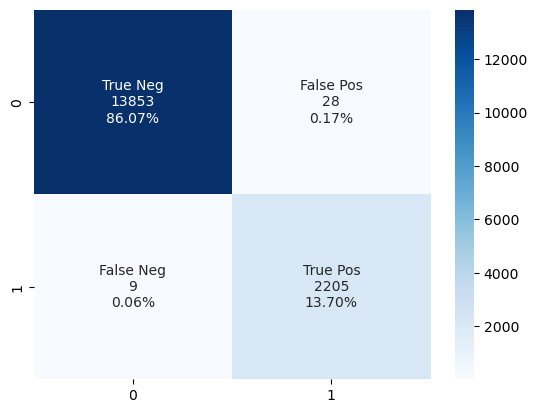

In [60]:
cf_matrix = confusion_matrix(y_train,predrf_train)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

####  Confusion matrix for Train data shows that the model is performing adequatly in predicting whether are person is loan defaulter or not , very less false negatives are observed. 


### Confusion Matrix- DT  (Test)

<Axes: >

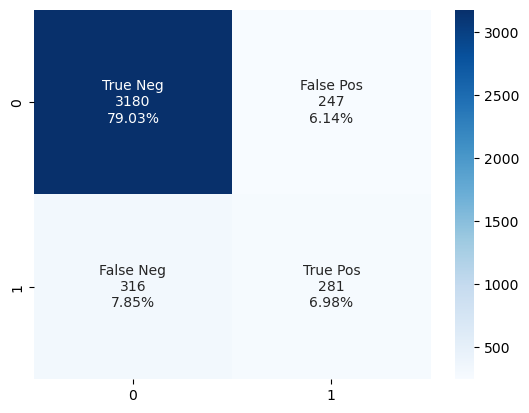

In [61]:
cf_matrix = confusion_matrix(y_test,predrf_test)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


####  Confusion matrix for Test data shows that the model is performing adequatly in predicting whether are person is loan defaulter or not. 


In [347]:
# To find best max-depth in DT classifier, for different max-depth values fitting the model.

In [62]:
max_depth = np.arange(2, 60, 4)
train_mape_scores_dt = []
test_mape_scores_dt = []

for k in max_depth:
    RF = RandomForestClassifier(n_estimators=k)

    
    # Train the model on the full training set and calculate train MAPE
    RF.fit(X_train, y_train)
    train_pred_dt = RF.predict(X_train)
    train_mape_dt = f1_score(y_train, train_pred_dt)
    train_mape_scores_dt.append(train_mape_dt)
    
    # Calculate test MAPE
    test_pred_dt = RF.predict(X_test)
    test_mape_dt = f1_score(y_test, test_pred_dt)
    test_mape_scores_dt.append(test_mape_dt)

In [72]:
Rf = pd.DataFrame({'Max-depth':np.arange(2, 60, 4), 'f-1Score(train)':train_mape_scores_dt, 'f-1Score(test)':test_mape_scores_dt })
Rf

,Max-depth,f-1Score(train),f-1Score(test)
0,2,0.777221,0.352423
1,6,0.944886,0.436715
2,10,0.972637,0.473684
3,14,0.983428,0.458768
4,18,0.988901,0.451796
5,22,0.990502,0.466604
6,26,0.992311,0.487085
7,30,0.991182,0.472197
8,34,0.992777,0.483696
9,38,0.992542,0.501786


### Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
lr = LogisticRegression()
model_lr = lr.fit(X_train, y_train)

In [66]:
predlr_train = model_lr.predict(X_train)
predlr_test = model_lr.predict(X_test)

In [67]:
print("F-1 score for Train dataset",f1_score(y_train,predlr_train))
print("F-1 score for Test dataset",f1_score(y_test,predlr_test))

F-1 score for Train dataset 0.5357538189063537
F-1 score for Test dataset 0.5202411714039622


### Confusion Matrix- Logistic Regression   (Train)

<Axes: >

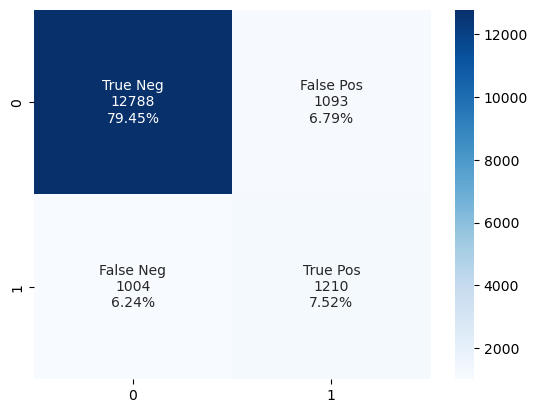

In [68]:
cf_matrix = confusion_matrix(y_train,predlr_train)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

####  Confusion matrix for Train data shows that the model is performing adequatly in predicting whether are person is loan defaulter or not , very less false negatives are observed. 


### Confusion Matrix- Logistic Regression  (Test)

<Axes: >

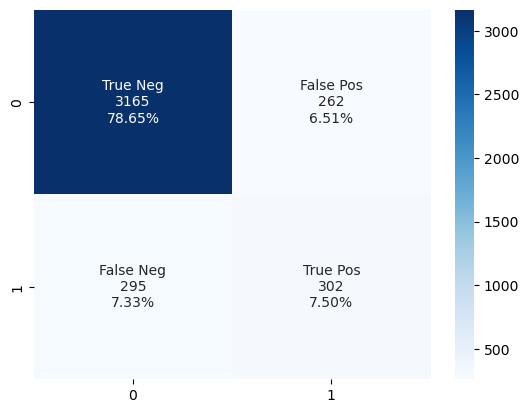

In [69]:
cf_matrix = confusion_matrix(y_test,predlr_test)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


####  Confusion matrix for Test data shows that the model is performing adequatly in predicting whether are person is loan defaulter or not. 


In [76]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, predrf_test, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, predlr_test, pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

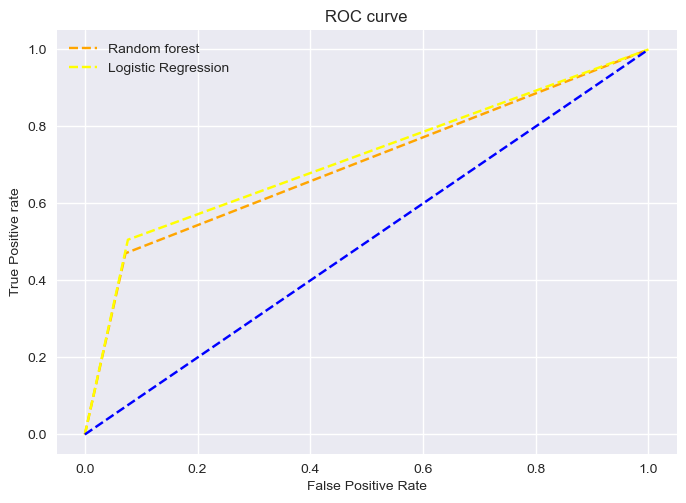

In [78]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random forest')
# plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic Regression')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Comparing all the models

In [75]:
compare = pd.DataFrame({'model':['KNN','Random Forest','Logistic Regression'],  'F-1 Score-train':[knn_train,f1_score(y_train,predrf_train),f1_score(y_train,predlr_train)],'F-1 Score-test':[knn_train,f1_score(y_test,predrf_test),f1_score(y_test,predlr_test)] })
compare

,model,F-1 Score-train,F-1 Score-test
0,KNN,0.686400,0.686400
1,Random Forest,0.991680,0.499556
2,Logistic Regression,0.535754,0.520241
